In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [76]:
balance_data = pd.read_csv('Decision_Tree_ Dataset.csv')


In [96]:
balance_data.rename(columns={'1':'Initial Payment','2':'Last Payment','3':'Credit Score'},inplace=True)

In [97]:
balance_data.head()

,Initial Payment,Last Payment,Credit Score,4,sum,Unnamed: 5,label
0,201,10018,250,3046,13515,yes,1
1,205,10016,395,3044,13660,yes,1
2,257,10129,109,3251,13746,yes,1
3,246,10064,324,3137,13771,yes,1
4,117,10115,496,3094,13822,yes,1


In [98]:
balance_data['label'] =balance_data['Unnamed: 5'].map({'No': 0, 'yes': 1})

In [100]:
X = balance_data.drop(['Unnamed: 5', '4','sum','label'], axis=1)
Y = balance_data[['label']]

In [131]:
X.head()

,Initial Payment,Last Payment,Credit Score
0,201,10018,250
1,205,10016,395
2,257,10129,109
3,246,10064,324
4,117,10115,496


In [132]:
Y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [103]:
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [104]:
X_scaled_minmax = minmaxscaler.fit_transform(X)
X_scaled_standard = standardscaler.fit_transform(X)

In [105]:
X_scaled_minmax = pd.DataFrame(X_scaled_minmax)
X_scaled_standard = pd.DataFrame(X_scaled_standard)

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled_standard, Y, test_size = 0.2, random_state = 100)

In [128]:
clf_entropy = DecisionTreeClassifier()
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0], dtype=int64)

In [130]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en))

Accuracy is  0.87


In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
cf_matrix = confusion_matrix(y_test, y_pred_en)

<AxesSubplot:>

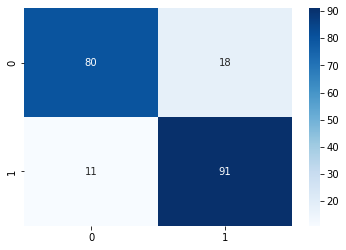

In [112]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,  cmap="Blues")